Knn model

In [1]:
# from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
sns.set()


In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
data_copy = data.copy(deep=True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose', 'BloodPressure','SkinThickness',
                                                                              'Insulin', 'BMI']].replace(0, np.NaN)
print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

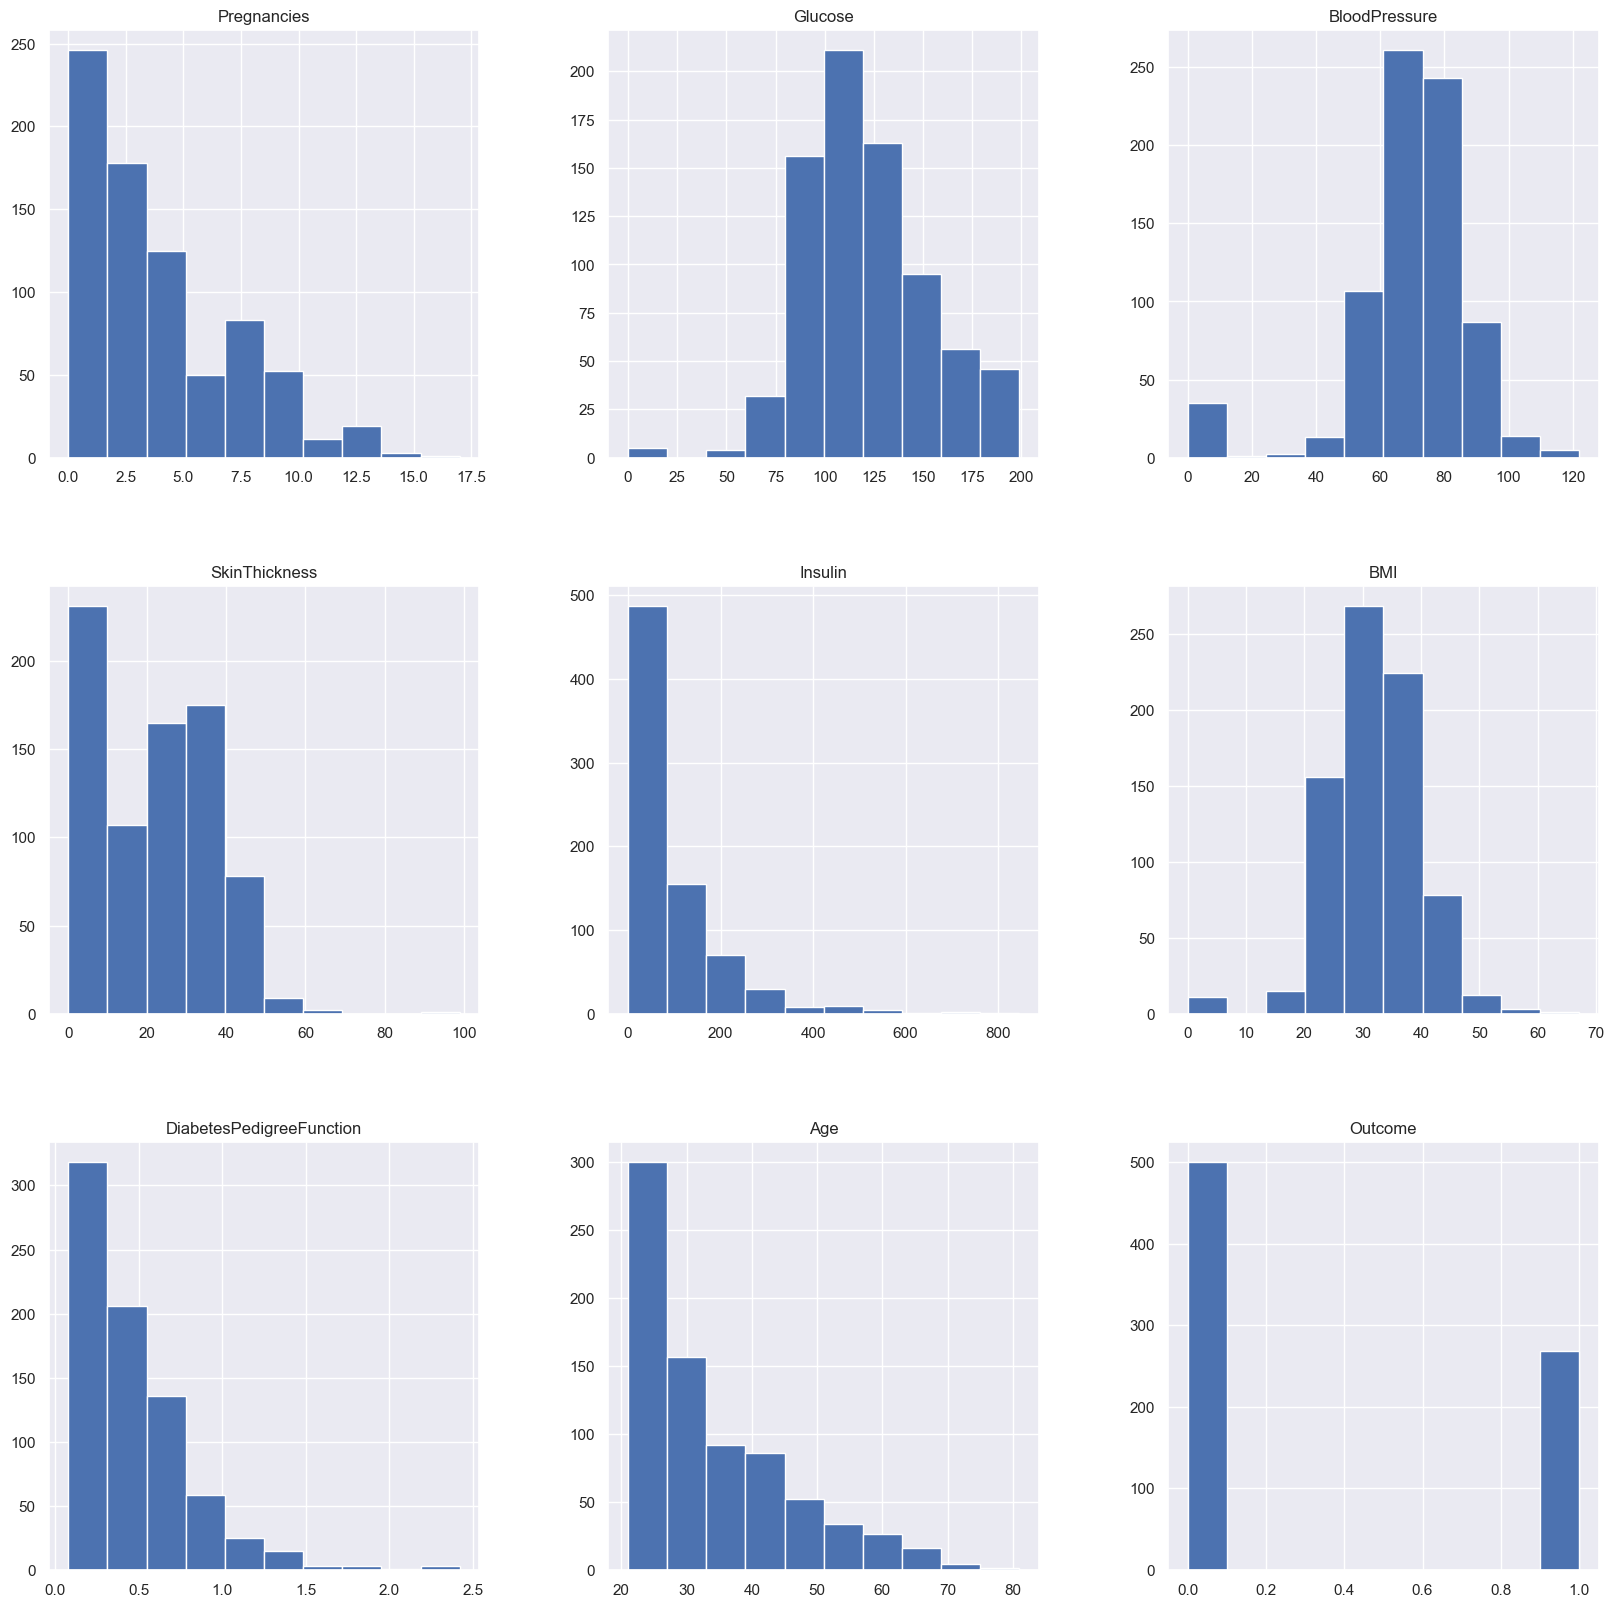

In [5]:
data.hist(figsize=(20,20))

In [6]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_copy.drop(columns = ['Outcome']), data_copy['Outcome'],
                                                   test_size = 0.2, random_state=0)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.2, random_state=0)
print(len(train_X), len(valid_X), len(test_X))

491 123 154


In [8]:
# KNN 모델 생성 및 학습
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(train_X, train_y)
print(KNN.score(valid_X, valid_y))

0.7398373983739838


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()  
scaler.fit(train_X)

# 벡터화된 데이터에 대해 스케일링
train_X_tr = scaler.fit_transform(train_X)
valid_X_tr = scaler.transform(valid_X)

KNN.fit(train_X_tr, train_y)

# 모델 평가
print(KNN.score(valid_X_tr, valid_y))


0.7642276422764228


In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
k_values = list(range(1, 15))
cv_scores = []
scaler = StandardScaler()
scaler. fit(train_X)
train_X_tr = scaler.transform(train_X)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X_tr, train_y, cv=5)
    cv_scores.append(np.mean(scores))
best_k = k_values[cv_scores.index(max(cv_scores))]

In [11]:
text_X_tr = scaler.transform(test_X)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_X_tr, train_y)
print(knn.score(train_X_tr, train_y)*100)

78.81873727087576


Text(0.5, 20.049999999999997, 'Predicted label')

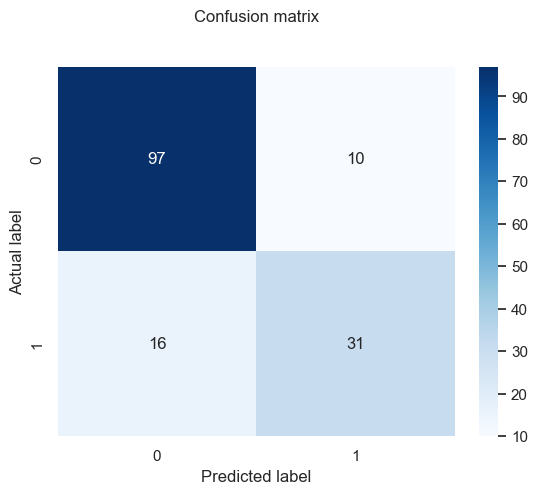

In [12]:
from sklearn.metrics import confusion_matrix 
from sklearn import metrics
y_pred = knn.predict(text_X_tr)
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
p = sns.heatmap(pd. DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.title( 'Confusion matrix', y=1.1) 
plt.ylabel( 'Actual label') 
plt.xlabel('Predicted label')

In [13]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.76      0.66      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



Decision Tree

In [14]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
DT = DecisionTreeClassifier()
DT.fit(train_X, train_y)
# 오버피팅
print(DT.score(train_X, train_y))
print(DT.score(test_X, test_y))


1.0
0.6558441558441559


In [15]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
tree_str = export_graphviz(DT, feature_names=train_X.columns, filled=True, out_file=None)
graph = pydotplus.graphviz.graph_from_dot_data(tree_str)
graph.write_png("DT.png")

True

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 트리 높이를 3으로 줄임.
# 오버피팅 fix
DT = DecisionTreeClassifier(max_depth=3, random_state=0)
DT.fit(train_X, train_y)
print(DT.score(train_X, train_y))
print(DT.score(test_X, test_y))

0.7841140529531568
0.7792207792207793


In [17]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
tree_str = export_graphviz(DT, feature_names=train_X.columns, filled=True, out_file=None)
graph = pydotplus.graphviz.graph_from_dot_data(tree_str)
graph.write_png("DT_depth3.png")

True